**A Hybrid Control Method for Sun Pointing and Spin-Axis Stabilization of Magnetorquer-Actuated Spacecraft**

Here we show the results of a controller made for Sun-pointing with magnetorquers only that is currently being submitted to the 2025 IEEE Aerosospace conference by Paulo Fisch and Zachary Manchester. Please look at Sun_pointing.jl to change parameters such as maximum control input, inertia matrices, gyro bias etc.

In [3]:
include("../src/Sun_pointing.jl")

run_combined_mc (generic function with 2 methods)

In [4]:
#Random Initial Conditions
s0 = [1; 0; 0] + 0.1*randn(3)
s0 = s0/norm(s0)
ω0 = (10*pi/180)*randn(3)
q0 = randn(4)
q0 = q0/norm(q0)
x0 = [q0; s0; ω0;eci0_1]

16-element Vector{Float64}:
      0.36108239152343774
      0.6114235431791647
      0.6219791466287848
      0.3300343899306244
      0.9762346110101074
     -0.2135634453089541
      0.036832581958280625
     -0.03775964419990391
      0.16339444586000063
      0.0558953155214482
     -5.527304715601687e6
 268785.1435750652
     -4.262918129708413e6
   4616.055774325734
    607.3109675032953
  -5945.516937353659

In [5]:
epc0 = Epoch(2020, 11, 8, 12, 0, 0, 0.0)
#Test of some of the SatelliteDynamics functions

#Orbit we want (around ISS orbit conditions)
sso1 = [6981e3, 0.00064, 95, 1.0804, 27.7899, 190];

# Convert osculating elements to Cartesean state
# returns position and velocity (m, m/s). This is the intial position
eci0_1 = sOSCtoCART(sso1, use_degrees=true)

6-element Vector{Float64}:
     -5.527304715601687e6
 268785.1435750652
     -4.262918129708413e6
   4616.055774325734
    607.3109675032953
  -5945.516937353659

In [6]:
xsim, tsim = run_simulation(x0, 0, 3*90*60, 0.05)

([0.36108239152343774 0.358653908283758 … 0.8080516985048563 0.8101054064589087; 0.6114235431791647 0.6105977905389463 … -0.38007638020453927 -0.38214666434450184; … ; 607.3109675032953 607.2952693369296 … 417.0766614838099 417.10548342154993; -5945.516937353659 -5945.267291188475 … -5897.439822106651 -5897.692993190509], 0.0:0.05:16200.0)

In [4]:
sun_error_mc, moment_error_mc,xhist_mc = run_monte_carlo_sim(2,sso1,0.05,3*90*60)

([119.79520117011317 57.351730306861725; 119.73242429365006 57.264479652493335; … ; 0.05692974779929123 0.04107357681714076; 0.05654168159532743 0.041117045456978384], [1.5693578073392176 1.8169176454921219; 1.5701607413387777 1.8167551384658223; … ; 1.2635543066658494 1.2778212326569742; 1.26354608587403 1.2778204075302955], [-0.15964214064080745 -0.15438631360728447 … 0.2744119777148577 0.2692651897918735; 0.2106669086132741 0.21445201460592778 … -0.40610183582406273 -0.40801090190941425; … ; 607.3109675032953 607.2952693369296 … 417.07652817246696 417.10535011242047; -5945.516937353659 -5945.267291188475 … -5897.43961109317 -5897.6927821920335;;; 0.3379464851137474 0.3404007005276696 … 0.2787131367828857 0.28295900799911594; -0.4934975165595302 -0.49566815989656243 … 0.5080941567432727 0.5113083193273744; … ; 607.3109675032953 607.2952693369296 … 417.07652817246696 417.10535011242047; -5945.516937353659 -5945.267291188475 … -5897.43961109317 -5897.6927821920335])

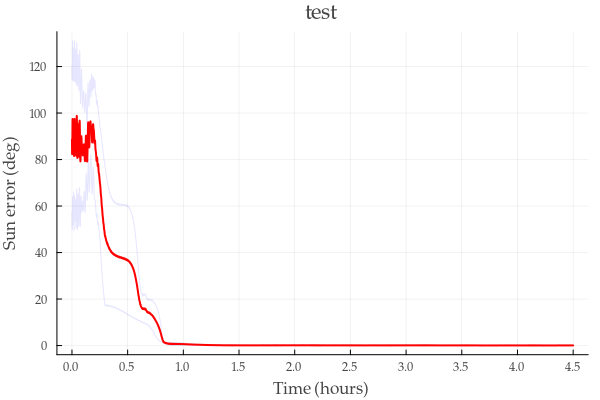

In [12]:
thist = 0:0.05:3*90*60
plot_mc_sun(sun_error_mc,2,thist,"test")

In [15]:
sun_error_mc, xhist_mc, momentum_error_mc, sun_error_mc_baseline, xhist_mc_baseline, momentum_error_mc_baseline = run_combined_mc(2,sso1,0.05,3*90*60)

([77.91519664618606 150.06315954067173; 77.83068033470076 150.16452097728296; … ; 0.009964060591378063 1.0443865402246968; 0.010270796164241768 1.0416954675238863], [0.31968341017712937 0.3231360005928938 … 0.16336430281183772 0.1675449214554197; -0.1414662752059591 -0.13669147771699008 … 0.3619816988139804 0.3585371437644847; … ; 607.3109675032953 607.2952693369296 … 417.07652817246696 417.10535011242047; -5945.516937353659 -5945.267291188475 … -5897.43961109317 -5897.6927821920335;;; 0.09447069966615626 0.09793879206242574 … 0.5247582883004752 0.5199128378759492; 0.32009686051364683 0.31731878951886305 … -0.3840294002190656 -0.384276263363241; … ; 607.3109675032953 607.2952693369296 … 417.07652817246696 417.10535011242047; -5945.516937353659 -5945.267291188475 … -5897.43961109317 -5897.6927821920335], [1.604208880050501 0.5894702641277769; 1.6040945309813126 0.590199127700695; … ; 1.3400417122186754 1.364035587693172; 1.3400421415814037 1.364047518294584], [77.91519664618606 150.0631